In [2]:
#Autor: Alma
import pandas as pd
from datetime import datetime
import time

pd.set_option("expand_frame_repr", False)
df_gfi = pd.read_csv('gfi_coll.csv',usecols=['created_at','repository_url'])
df_other_iss= pd.read_csv('otheri_coll.csv',usecols=['created_at','repository_url'])
df_all_iss= pd.read_csv('all_issues_fin.csv',usecols=['created_at','repository_url'])
df_gfi['created_at'] = pd.to_datetime(df_gfi['created_at'])
df_other_iss['created_at'] = pd.to_datetime(df_other_iss['created_at'])
df_all_iss['created_at'] = pd.to_datetime(df_all_iss['created_at'])
print(df_all_iss.sort_values(by=['created_at']).head(20))

                                           repository_url                created_at
309555  https://api.github.com/repos/phpmyadmin/phpmya... 2005-12-15 19:29:31+00:00
169564  https://api.github.com/repos/spring-projects/s... 2006-08-27 23:01:38+00:00
169563  https://api.github.com/repos/spring-projects/s... 2007-03-28 01:14:42+00:00
265805           https://api.github.com/repos/sympy/sympy 2007-06-17 02:59:23+00:00
169562  https://api.github.com/repos/spring-projects/s... 2007-07-20 10:44:36+00:00
169561  https://api.github.com/repos/spring-projects/s... 2007-09-04 10:25:27+00:00
265804           https://api.github.com/repos/sympy/sympy 2007-09-10 11:07:27+00:00
265803           https://api.github.com/repos/sympy/sympy 2007-09-12 08:58:18+00:00
265802           https://api.github.com/repos/sympy/sympy 2007-09-15 21:04:19+00:00
265801           https://api.github.com/repos/sympy/sympy 2007-09-25 01:30:44+00:00
265800           https://api.github.com/repos/sympy/sympy 2007-09-25 08:27:0

In [3]:
# first_issues_count = df_gfi.groupby([df_gfi['created_at'].dt.year,'repository_url'], as_index=False).count()
# first_issues_count = df_gfi.groupby(df_gfi['created_at'].dt.year, as_index=False)["repository_url"].nunique()
# print(first_issues_count)
first_issues_count = df_gfi.groupby(df_gfi['created_at'].dt.year).agg(total = pd.NamedAgg('repository_url',aggfunc=pd.Series.nunique))
first_issues_count['created_at']= first_issues_count.index
first_issues_count['created_at'] = pd.to_datetime(first_issues_count['created_at'], format='%Y')
print(first_issues_count)

            total created_at
created_at                  
2008            1 2008-01-01
2009            1 2009-01-01
2010            1 2010-01-01
2011            4 2011-01-01
2012           15 2012-01-01
2013           24 2013-01-01
2014           43 2014-01-01
2015           95 2015-01-01
2016          119 2016-01-01
2017          182 2017-01-01
2018          226 2018-01-01
2019          236 2019-01-01
2020          285 2020-01-01
2021          249 2021-01-01
2022          163 2022-01-01


In [4]:
# first_issues_count_2 = df_gfi.groupby(df_gfi['created_at'].dt.year, as_index=False)["repository_url"]
# print(first_issues_count_2)
# print(df_all_iss.columns)'
# print(df_all_iss)
gr = df_all_iss.groupby(df_all_iss['created_at'].dt.year)
print(gr)
all_issues_count = df_all_iss.groupby(df_all_iss['created_at'].dt.year).agg(total = pd.NamedAgg('repository_url',aggfunc=pd.Series.nunique))
# url_unique = df_gfis['repository_url'].unique()
all_issues_count['created_at']= all_issues_count.index
all_issues_count['created_at'] = pd.to_datetime(all_issues_count['created_at'], format='%Y')
print(all_issues_count)


            total created_at
created_at                  
2005            1 2005-01-01
2006            1 2006-01-01
2007            2 2007-01-01
2008            3 2008-01-01
2009            8 2009-01-01
2010           22 2010-01-01
2011           55 2011-01-01
2012          114 2012-01-01
2013          201 2013-01-01
2014          318 2014-01-01
2015          462 2015-01-01
2016          579 2016-01-01
2017          683 2017-01-01
2018          790 2018-01-01
2019          867 2019-01-01
2020          930 2020-01-01
2021          970 2021-01-01
2022          890 2022-01-01


In [5]:
all_issues_count.drop(all_issues_count.head(3).index,inplace=True)

In [6]:
print(all_issues_count)

            total created_at
created_at                  
2008            3 2008-01-01
2009            8 2009-01-01
2010           22 2010-01-01
2011           55 2011-01-01
2012          114 2012-01-01
2013          201 2013-01-01
2014          318 2014-01-01
2015          462 2015-01-01
2016          579 2016-01-01
2017          683 2017-01-01
2018          790 2018-01-01
2019          867 2019-01-01
2020          930 2020-01-01
2021          970 2021-01-01
2022          890 2022-01-01


In [7]:
first_iss_cut = first_issues_count.tail(13)
all_iss_cut = all_issues_count.tail(13)
# print(first_iss_cut)
# print(all_iss_cut)
data={'created_at': first_iss_cut["created_at"],'ratio': ((first_iss_cut["total"].div(all_iss_cut["total"]))*1000).round()}
df_ratio = pd.DataFrame(data)  
# df_ratio = (first_iss_cut["total"].div(all_iss_cut["total"]))*1000
# ratio['created_at']= ratio.index
# ratio['created_at'] = pd.to_datetime(ratio['created_at'], format='%Y')
print(df_ratio)

           created_at  ratio
created_at                  
2010       2010-01-01   45.0
2011       2011-01-01   73.0
2012       2012-01-01  132.0
2013       2013-01-01  119.0
2014       2014-01-01  135.0
2015       2015-01-01  206.0
2016       2016-01-01  206.0
2017       2017-01-01  266.0
2018       2018-01-01  286.0
2019       2019-01-01  272.0
2020       2020-01-01  306.0
2021       2021-01-01  257.0
2022       2022-01-01  183.0


In [8]:
first_issue_cute_top2 = first_issues_count.head(13)
df_ratio_cutted = df_ratio.head(11)

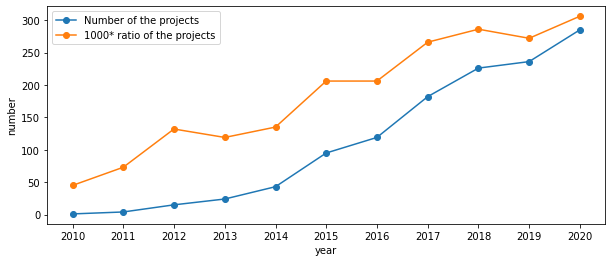

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import PercentFormatter

import matplotlib.dates as mdates
import numpy
fig, ax = plt.subplots(figsize=(10, 4))
# plt.xticks(first_issues_count['created_at']) 
# plt.yticks(first_issues_count['created_at'])
# ax = fig.add_subplot(111)
# xs = np.logspace(1,10,10)
# ax.set_yscale('log')

plt.plot_date(first_issue_cute_top2['created_at'].tail(11), first_issue_cute_top2['total'].tail(11),linestyle='solid',label='Number of the projects')
plt.plot_date(df_ratio_cutted['created_at'], df_ratio_cutted['ratio'],linestyle='solid',label='1000* ratio of the projects')

plt.legend()
plt.ylabel("number",fontsize=10)
plt.xlabel("year",fontsize=10)
plt.show()



